### 웹 크롤링
1. 필수 라이브러리 requests 

In [ ]:
import requests

In [ ]:
url = "https://www.naver.com"
response = requests.get(url)

In [ ]:
html_data = response.text

In [ ]:
html_data.find("네이버")

In [ ]:
html_data[365:368]

### beautifulsoup 라이브러리 설치
1. html Tag의 데이터를 쉽게 추출하기 위한 라이브러리 
2. 웹의 구조를 어느정도 인지를 한 상태에서 이 라이브러리 사용하면 쉽게 데이터 추출이 가능
3. 파서(parser)를 활용해서 파이썬에서 접근이 쉽게 객체형태로 제공

In [ ]:
!pip install bs4

In [ ]:
from bs4 import BeautifulSoup as bs

In [ ]:
soup = bs(html_data, 'html.parser')

- 태그명을 사용하여 검색 
    - 태그 : 해당 태그의 첫 번째 정보를 출력
    - 태그['속성'] : 해당 태그의 첫 번째 속성에 대한 값을 출력

In [ ]:
print(soup.title)
print(soup.title.name)
print(soup.title.string)

In [ ]:
print(soup.img)
print(soup.img['height'])
print(soup.img['src'])

- find()
    - HTML 안에서 해당 태그의 대한 첫 번째 정보를 출력
    - find(속성='값'): HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 출력
- find_all()
    - HTML안에 해당 태그에 대한 모든 정보를 리스트 형식으로 출력
    - limit 속성 : 리스트의 길이를 지정 

In [ ]:
print(soup.find('a'))

In [ ]:
print(soup.find(id = 'newsstand'))

In [ ]:
# print(soup.find_all('span'))
# print(soup.find_all('span', limit = 10))
print(soup.find_all('span')[2])

In [ ]:
## 해당 태그에서 class 값을 기준으로 출력
# print(soup.find_all('span', class_='blind'))
print(soup.find_all('span', attrs={
    'class' : 'blind'
}))

In [ ]:
(soup.find('span')).get_text()

In [ ]:
span_list = soup.find_all('span', attrs={'class' : 'blind'})
span_text = []
for i in span_list:
    span_text.append(i.get_text())
print(span_text)

In [ ]:
## map 함수
## map(함수, 리스트형태 데이터)
def change(x):
    return x.get_text()
print(list(map(change, span_list)))

In [ ]:
print(list(map(lambda x : x.get_text(), span_list)))

In [ ]:
## select_one(), select()
print(soup.select_one('a'))
print(soup.select('body a'))

In [ ]:
print(soup.select("div > ul"))

### selenium 라이브러리 
1. 웹 어플리케이션 테스트를 위한 라이브러리 
2. python으로 웹 브라우져 제어하는 기능
3. 웹 드라이버 별도의 프로그램 설치 

In [ ]:
## 라이브러리 설치 
!pip install selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [ ]:
# path는 web driver의 경로 지정
## 절대 경로
# windows
# path = "c://chromedriver"
# mac
# path = "/users/moons/chromeriver"
## 상대경로
path = "../webdriver/chromedriver"
driver = webdriver.Chrome(path)
driver.get("https://www.naver.com")

"/users/유저명/desktop/chromedriver"

In [ ]:
element = driver.find_element(By.ID, 'query')
element.send_keys("구디 맛집")

In [ ]:
element.send_keys(Keys.ENTER)

In [ ]:
soup = bs(driver.page_source, 'html.parser')
print(soup)

In [52]:
import time

## 크롤링 class 생성
1. 생성자 함수 처음 웹드라이버가 접속할 주소를 입력
2. 새로운 함수 생성 - 검색어를 인자값으로 보내주면 웹드라이버에서 검색 후 검색한 페이지를 텍스트형태로 리턴

In [68]:
class Web():
    # 생성자 함수에서는 입력한 주소 값만 저장
    def __init__(self, _url):
        self.url = _url

    # 검색 함수에서는 검색어를 인자로 받고 
    # 웹드라이버를 실행
    # 검색 창에 검색어를 입력 
    # 검색 창 클릭
    # 페이지 이동 후 페이지의 html코드를 bs4를 이용하여 객체화 한 데이터를 리턴
    def search(self, _search):
        self.path = "../webdriver/chromedriver"
        self.driver = webdriver.Chrome(self.path)
        print(self.url)
        self.driver.get(self.url)
        # 1초 딜레이 생성
        time.sleep(1)
        self.element = self.driver.find_element(By.ID, "query")
        self.element.send_keys(_search)
        self.element.send_keys(Keys.ENTER)
        time.sleep(1)
        self.result = bs(self.driver.page_source, "html.parser")
        return self.result

In [69]:
test = Web("https://www.naver.com")

C:\Users\moons\AppData\Local\Temp\ipykernel_6096\1011429639.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  self.driver = webdriver.Chrome(self.path)


https://www.naver.com


<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/108.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="파싱 뜻 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'파싱 뜻'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'파싱 뜻'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>파싱 뜻 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https
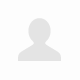
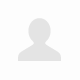

In [70]:
test.search("파싱 뜻")